<a href="https://colab.research.google.com/github/mdwai/JAVA-BOOK/blob/master/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using existing X with type <class 'numpy.ndarray'>
X shape (n_samples, n_features): (300, 2)


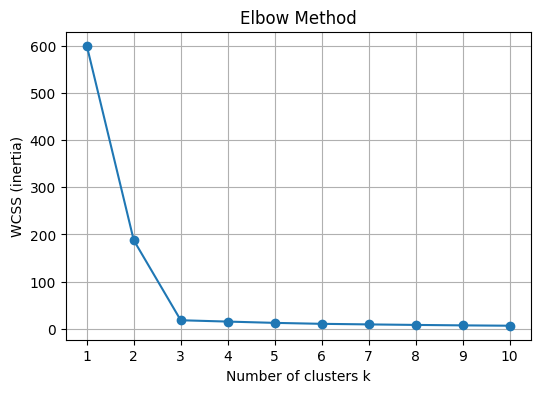

Cluster counts: [100 100 100]


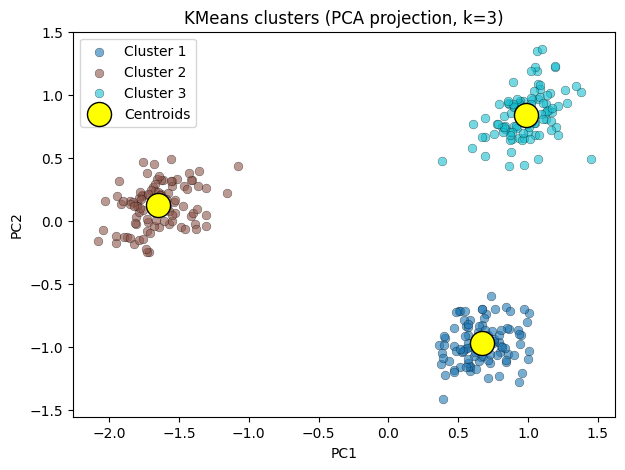

If you have a pandas DataFrame `df`, do: df['kmeans_label'] = y_kmeans
Fitted KMeans with k=3. First 10 labels: [1 1 0 2 1 2 0 2 0 0]


In [3]:
# Clustering end-to-end: elbow, fit KMeans, visualize (handles 1D and multi-D)
# If scikit-learn/matplotlib not installed, run: !pip install -U scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# If you already have X (numpy array or pandas DataFrame), skip this block.
# Otherwise a small synthetic dataset will be created so the cell runs out-of-the-box.
if "X" not in globals():
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=1.0, random_state=42)
    print("No X found: created example dataset with shape", X.shape)
else:
    print("Using existing X with type", type(X))

# Convert to numpy and ensure 2D shape for sklearn
X = np.asarray(X)
if X.ndim == 1:
    X = X.reshape(-1, 1)
print("X shape (n_samples, n_features):", X.shape)

# Scale features (recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1) Elbow method to pick number of clusters
wcss = []
max_k = 10 if X.shape[0] >= 10 else max(2, X.shape[0]//2)
for k in range(1, max_k + 1):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xticks(range(1, max_k + 1))
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# 2) Fit final KMeans (set n_clusters to your chosen value from the elbow plot)
n_clusters = 3  # <-- change this after inspecting the elbow chart
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
print("Cluster counts:", np.bincount(y_kmeans))

# 3) Visualization
n_features = X_scaled.shape[1]

if n_features >= 2:
    # Use PCA to reduce to 2D for plotting (keeps centroids consistent)
    pca = PCA(n_components=2, random_state=42)
    X_vis = pca.fit_transform(X_scaled)
    centroids_vis = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(7,5))
    colors = plt.cm.tab10(np.linspace(0,1,n_clusters))
    for i, c in enumerate(colors[:n_clusters]):
        plt.scatter(X_vis[y_kmeans == i, 0], X_vis[y_kmeans == i, 1],
                    s=40, c=[c], label=f'Cluster {i+1}', alpha=0.6, edgecolor='k', linewidth=0.3)
    plt.scatter(centroids_vis[:,0], centroids_vis[:,1], s=300, c='yellow', label='Centroids', edgecolor='k')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.legend(); plt.title(f'KMeans clusters (PCA projection, k={n_clusters})')
    plt.show()

else:
    # 1D data visualization: histogram + jittered scatter (feature value vs cluster)
    x = X_scaled.ravel()
    plt.figure(figsize=(8,3))
    for i in range(n_clusters):
        plt.hist(x[y_kmeans == i], bins=30, alpha=0.5, label=f'Cluster {i+1}')
    plt.xlabel('Feature (scaled)'); plt.ylabel('Count'); plt.title(f'Clusters histogram (k={n_clusters})')
    plt.legend(); plt.show()

    # jittered scatter to see point membership
    y_jitter = y_kmeans + np.random.normal(0, 0.06, size=len(y_kmeans))
    plt.figure(figsize=(8,2.5))
    plt.scatter(x, y_jitter, c=y_kmeans, cmap='tab10', s=30, alpha=0.8, edgecolor='k')
    plt.yticks(range(n_clusters), [f'Cluster {i+1}' for i in range(n_clusters)])
    plt.xlabel('Feature (scaled)'); plt.title('Cluster membership (1D feature, jittered)')
    plt.show()

# 4) Optional: attach labels back to dataframe if you have one
try:
    import pandas as pd
    if isinstance(globals().get('X'), pd.DataFrame):
        X_df = X.copy()
        X_df['kmeans_label'] = y_kmeans
        print("Added 'kmeans_label' column to your DataFrame (variable name unchanged).")
    else:
        # if the original X came from a DataFrame called `df`, user can do:
        print("If you have a pandas DataFrame `df`, do: df['kmeans_label'] = y_kmeans")
except Exception:
    pass

# Print a quick summary
print(f"Fitted KMeans with k={n_clusters}. First 10 labels: {y_kmeans[:10]}")

Using existing X with type <class 'numpy.ndarray'>
X shape (n_samples, n_features): (300, 2)


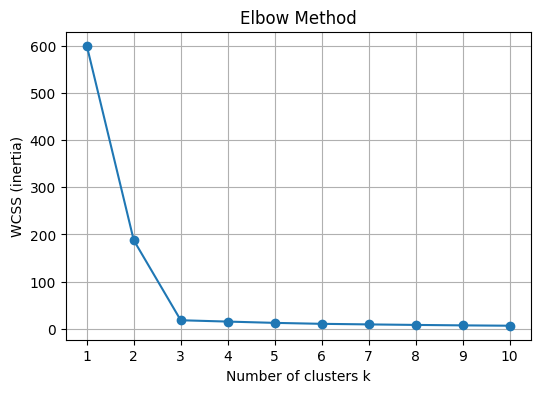

Cluster counts: [100 100 100]


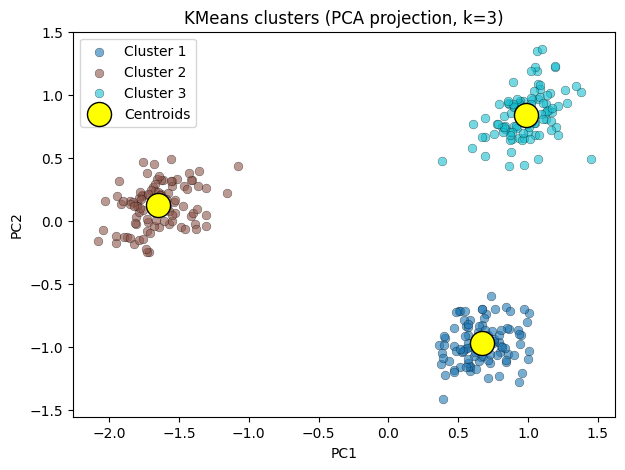

If you have a pandas DataFrame `df`, do: df['kmeans_label'] = y_kmeans
Fitted KMeans with k=3. First 10 labels: [1 1 0 2 1 2 0 2 0 0]


In [4]:
# Clustering end-to-end: elbow, fit KMeans, visualize (handles 1D and multi-D)
# If scikit-learn/matplotlib not installed, run: !pip install -U scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# If you already have X (numpy array or pandas DataFrame), skip this block.
# Otherwise a small synthetic dataset will be created so the cell runs out-of-the-box.
if "X" not in globals():
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=1.0, random_state=42)
    print("No X found: created example dataset with shape", X.shape)
else:
    print("Using existing X with type", type(X))

# Convert to numpy and ensure 2D shape for sklearn
X = np.asarray(X)
if X.ndim == 1:
    X = X.reshape(-1, 1)
print("X shape (n_samples, n_features):", X.shape)

# Scale features (recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1) Elbow method to pick number of clusters
wcss = []
max_k = 10 if X.shape[0] >= 10 else max(2, X.shape[0]//2)
for k in range(1, max_k + 1):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xticks(range(1, max_k + 1))
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# 2) Fit final KMeans (set n_clusters to your chosen value from the elbow plot)
n_clusters = 3  # <-- change this after inspecting the elbow chart
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
print("Cluster counts:", np.bincount(y_kmeans))

# 3) Visualization
n_features = X_scaled.shape[1]

if n_features >= 2:
    # Use PCA to reduce to 2D for plotting (keeps centroids consistent)
    pca = PCA(n_components=2, random_state=42)
    X_vis = pca.fit_transform(X_scaled)
    centroids_vis = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(7,5))
    colors = plt.cm.tab10(np.linspace(0,1,n_clusters))
    for i, c in enumerate(colors[:n_clusters]):
        plt.scatter(X_vis[y_kmeans == i, 0], X_vis[y_kmeans == i, 1],
                    s=40, c=[c], label=f'Cluster {i+1}', alpha=0.6, edgecolor='k', linewidth=0.3)
    plt.scatter(centroids_vis[:,0], centroids_vis[:,1], s=300, c='yellow', label='Centroids', edgecolor='k')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.legend(); plt.title(f'KMeans clusters (PCA projection, k={n_clusters})')
    plt.show()

else:
    # 1D data visualization: histogram + jittered scatter (feature value vs cluster)
    x = X_scaled.ravel()
    plt.figure(figsize=(8,3))
    for i in range(n_clusters):
        plt.hist(x[y_kmeans == i], bins=30, alpha=0.5, label=f'Cluster {i+1}')
    plt.xlabel('Feature (scaled)'); plt.ylabel('Count'); plt.title(f'Clusters histogram (k={n_clusters})')
    plt.legend(); plt.show()

    # jittered scatter to see point membership
    y_jitter = y_kmeans + np.random.normal(0, 0.06, size=len(y_kmeans))
    plt.figure(figsize=(8,2.5))
    plt.scatter(x, y_jitter, c=y_kmeans, cmap='tab10', s=30, alpha=0.8, edgecolor='k')
    plt.yticks(range(n_clusters), [f'Cluster {i+1}' for i in range(n_clusters)])
    plt.xlabel('Feature (scaled)'); plt.title('Cluster membership (1D feature, jittered)')
    plt.show()

# 4) Optional: attach labels back to dataframe if you have one
try:
    import pandas as pd
    if isinstance(globals().get('X'), pd.DataFrame):
        X_df = X.copy()
        X_df['kmeans_label'] = y_kmeans
        print("Added 'kmeans_label' column to your DataFrame (variable name unchanged).")
    else:
        # if the original X came from a DataFrame called `df`, user can do:
        print("If you have a pandas DataFrame `df`, do: df['kmeans_label'] = y_kmeans")
except Exception:
    pass

# Print a quick summary
print(f"Fitted KMeans with k={n_clusters}. First 10 labels: {y_kmeans[:10]}")